In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import json
import matplotlib as mpl

from matplotlib import pyplot as plt
from pathlib import Path
from typing import Any

plt.style.use("grayscale")

mpl.rc("font", size=16)

In [3]:
output_dir = Path("../plots")
if not output_dir.exists():
    output_dir.mkdir(parents=True, exist_ok=True)

In [4]:
def plot_canonical_dimensions(data: dict[str, Any], suffix: str | None = None):
    """
    Plot a single instance of the canonical dimensions.

    Parameters
    ----------
    data : dict[str, Any]
        The results of the computation of the canonical dimensions.
    suffix : str, optional
        The suffix of the file name.
    """
    _, ax = plt.subplots(figsize=(7, 5), layout="constrained")

    ax.plot(data["k2"], data["dimu2"], "r-", label=r"$\text{dim}(u_{2})$")
    ax.plot(data["k2"], data["dimu4"], "g--", label=r"$\text{dim}(u_{4})$")
    ax.plot(data["k2"], data["dimu6"], "b-.", label=r"$\text{dim}(u_{6})$")

    ax.set_xlabel(r"$k^2$")
    ax.set_ylabel("canonical dimensions")
    ax.ticklabel_format(
        axis="both", style="sci", scilimits=(0, 0), useMathText=True
    )
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=3,
        frameon=False,
    )
    ax2 = ax.twinx()
    ax2.plot(data["k2"], data["dist"], "k--")
    ax2.set(ylabel="PDF")

    if suffix is None:
        plt.savefig(output_dir / "canonical_dimensions.pdf")
    else:
        plt.savefig(output_dir / f"canonical_dimensions_{suffix}.pdf")

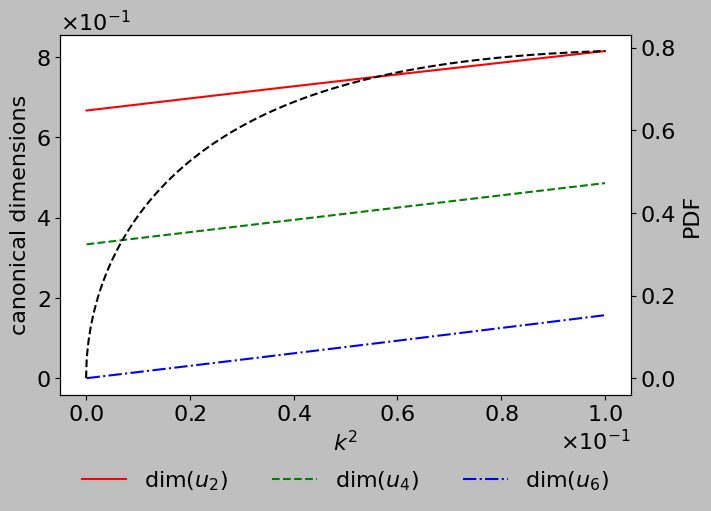

In [ ]:
data = "../results/mp_canonical_dimensions_analytic.json"
with open(data) as f:
    data = json.load(f)

plot_canonical_dimensions(data, suffix="analytic")

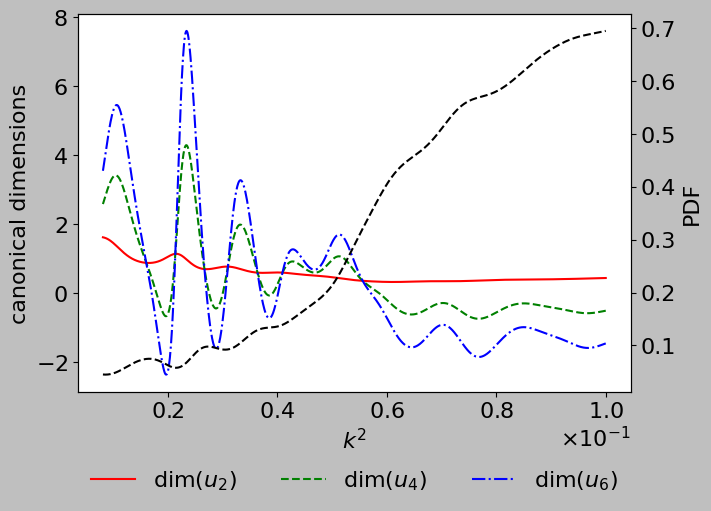

In [6]:
data = "../results/mp_canonical_dimensions_snr=0.4371238220090564.json"
with open(data) as f:
    data = json.load(f)

plot_canonical_dimensions(data, suffix="snr=0.4371238220090564")